<a href="https://colab.research.google.com/github/geonextgis/PyImgProc-Image-Processing-using-Python/blob/main/025_introduction_to_opencv_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to OpenCV in Python**
OpenCV (Open Source Computer Vision Library) is an open-source software library for computer vision, image processing, and machine learning. It was initially developed by Intel and later supported by Willow Garage and Itseez. OpenCV is designed to be highly efficient, providing tools for real-time computer vision applications.

<img src = "https://miro.medium.com/v2/resize:fit:2000/1*S8Il5ethl3YFh0M9XKVz-A.png" width="60%">

**Key Features of OpenCV:**
1. **Image Processing:** OpenCV includes numerous functions for tasks such as filtering, image transformations, color space conversion, edge detection, and morphological operations.

2. **Computer Vision:** It supports object detection, face recognition, motion analysis, camera calibration, and 3D reconstruction.

3. **Machine Learning:** OpenCV has modules for implementing machine learning algorithms, like support vector machines, k-nearest neighbors, and neural networks, which can be used for tasks like object classification and recognition.

4. **Cross-Platform Support:** OpenCV is cross-platform, meaning it works on various operating systems, including Windows, macOS, Linux, Android, and iOS.

5. **Language Bindings:** It provides interfaces for several programming languages, including C++, Python, Java, and MATLAB, making it accessible to a wide range of developers.

6. **Real-Time Operations:** OpenCV is optimized for performance, making it suitable for real-time image processing and computer vision applications.

Due to its versatility and comprehensive set of tools, OpenCV is widely used in fields such as robotics, automotive industry, security, augmented reality, and even in research and academia.

## **Import Required Libraries**

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

## **Read an Image using OpenCV**

In OpenCV, the `cv2.imread()` function is used to read an image from a file and load it into a variable as a NumPy array. This function allows you to specify how the image should be read, whether in color, grayscale, or unchanged.

**Parameters**
- **`filename`**:
  - This is the path to the image file you want to read.

- **`flags`** (optional):
  - This parameter specifies how the image should be read. It can take one of the following values:
    - `cv2.IMREAD_COLOR` (or `1`): Reads the image in color mode (default). Any transparency of the image will be neglected.
    - `cv2.IMREAD_GRAYSCALE` (or `0`): Reads the image in grayscale mode (ignoring color information).
    - `cv2.IMREAD_UNCHANGED` (or `-1`): Reads the image as is, including the alpha channel if it exists.

🤔 **Note:**
The conversion to grayscale is typically done using a weighted sum of the original color channels. The standard formula used by OpenCV for this conversion is:
$$
\text{Gray} = 0.299 \times R + 0.587 \times G + 0.114 \times B
$$
   - Here, $R$ , $G$, and $B$ are the red, green, and blue components of the pixel, respectively. The weights are applied to account for human perception, as the human eye is more sensitive to green light and less to blue.

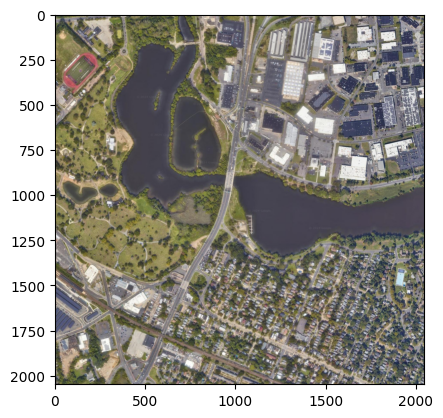

In [22]:
# Define the image path
img_path = r"/content/drive/MyDrive/Colab Notebooks/GitHub Repo/PyImgProc-Image-Processing-using-Python/Datasets/High_Res_RGB_Google_Image.tif"

# Read the image in BGR (Default) format using OpenCV
img = cv2.imread(img_path, 1)

# Plot the RGB image using matplotlib
plt.imshow(img[:, :, ::-1]);

## **Splitting Channels**
In image processing with OpenCV, splitting channels involves separating an image's color channels into individual components. This is typically done with color images that use the RGB or BGR color models, where each pixel consists of multiple color channels.

For a color image, the `cv2.split()` function is used to split the image into its constituent channels. In the BGR color model (which is used by default in OpenCV), the image has three channels: Blue, Green, and Red.

In [23]:
# Check the shape of the image
img.shape

(2048, 2048, 3)

In [24]:
# Extract all the four corner pixels
print("Top left pixel:", img[0, 0])
print("Top right:", img[0, 2047])
print("Bottom left:", img[2047, 0])
print("Bottom right:", img[0, 2047])

Top left pixel: [76 82 76]
Top right: [129 156 164]
Bottom left: [87 75 73]
Bottom right: [129 156 164]


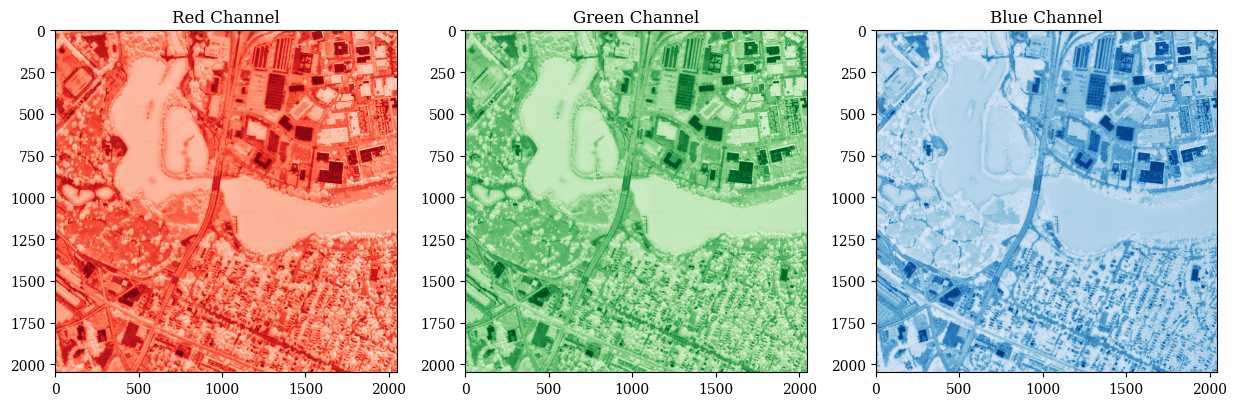

In [28]:
# Extract all the bands seperately
red = img[:, :, 2]
green = img[:, :, 1]
blue = img[:, :, 0]

# Plot the bands
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

axes[0].imshow(red, cmap="Reds")
axes[0].set_title("Red Channel")

axes[1].imshow(green, cmap="Greens")
axes[1].set_title("Green Channel")

axes[2].imshow(blue, cmap="Blues")
axes[2].set_title("Blue Channel");

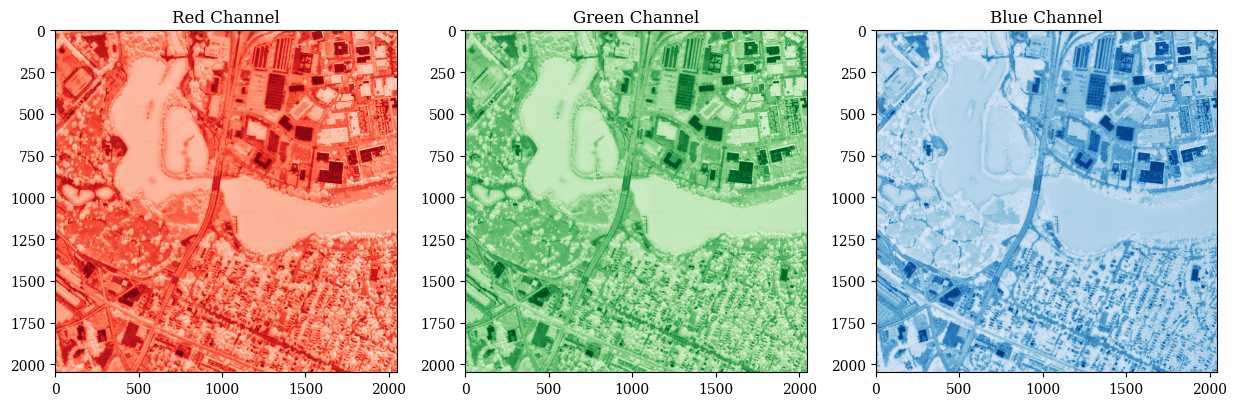

In [29]:
# Extract all the bands seperately using OpenCV's builtin function
blue, green, red = cv2.split(img)

# Plot the bands
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

axes[0].imshow(red, cmap="Reds")
axes[0].set_title("Red Channel")

axes[1].imshow(green, cmap="Greens")
axes[1].set_title("Green Channel")

axes[2].imshow(blue, cmap="Blues")
axes[2].set_title("Blue Channel");

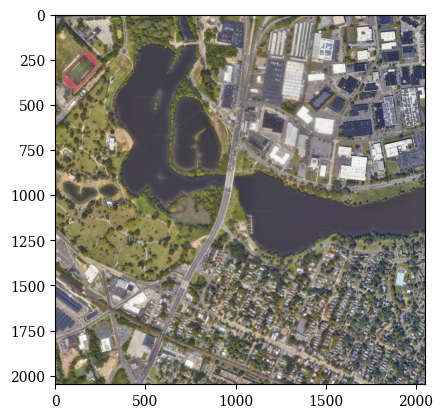

In [31]:
# Combine all the seperate bands to form an RGB image
img_merged = cv2.merge((blue, green, red))

plt.imshow(img_merged[:, :, ::-1]);

## **Resizing Image**
To resize an image using OpenCV, you can use the `cv2.resize()` function.

**Parameters**:

1. **`src`**: The input image you want to resize. (Type: `numpy.ndarray`)

2. **`dsize`**: Desired output size as a tuple `(width, height)`. This specifies the new dimensions of the image. If you use `dsize`, `fx` and `fy` are ignored.

3. **`fx` and `fy`** (Optional): Scaling factors for width and height. They adjust the size by a factor relative to the original dimensions.

4. **`interpolation`**: Method for resampling the image:
   - **`cv2.INTER_NEAREST`**: Fast but low quality.
   - **`cv2.INTER_LINEAR`**: Good balance of quality and speed; default for enlarging.
   - **`cv2.INTER_CUBIC`**: High quality for enlarging, slower.
   - **`cv2.INTER_LANCZOS4`**: Very high quality, especially for reducing size, but slow.

**Note**: Use `dsize` for exact dimensions, and `fx`/`fy` for scaling by factors. Choose the interpolation method based on the quality and speed you need.

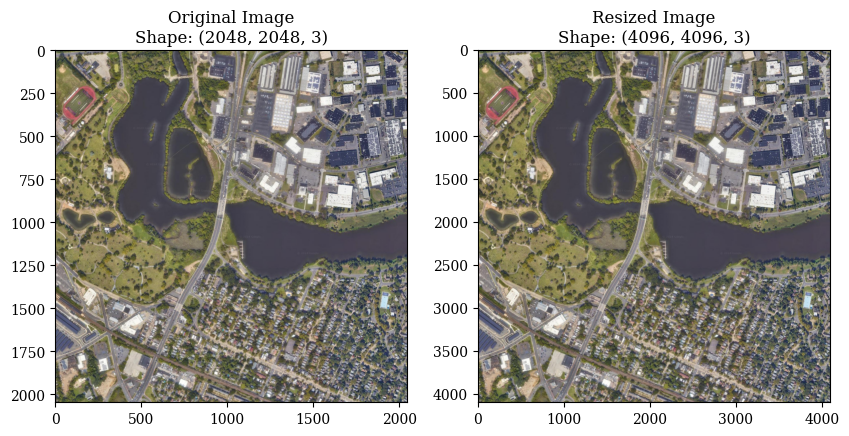

In [33]:
# Increase the size of the pixels by two times
resized_img = cv2.resize(img, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Plot the original image and the resized image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes = axes.flatten()

axes[0].imshow(img[:, :, ::-1])
axes[0].set_title(f"Original Image\nShape: {img.shape}")

axes[1].imshow(resized_img[:, :, ::-1])
axes[1].set_title(f"Resized Image\nShape: {resized_img.shape}");